In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [31]:
#loading data
data = pd.read_csv("C:/Users/Administrator/Downloads/heart_failure_clinical_records_dataset.csv")
data.head()

#Kode tersebut membaca dataset dari file CSV yang terletak di "C:/Users/Administrator/Downloads/heart_failure_clinical_records_dataset.csv" menggunakan Pandas. Fungsi pd.read_csv() mengimpor data ke dalam DataFrame, dan data.head() menampilkan lima baris pertama dari dataset untuk inspeksi awal.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [32]:
data.info()

#fungsi ini memberikan ringkasan informasi tentang DataFrame data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [35]:
print(df.isnull().sum())

#Fungsi print(df.isnull().sum()) pada Jupyter Notebook digunakan untuk memeriksa jumlah nilai yang hilang (null) di setiap kolom dalam DataFrame

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [36]:
# Jika ada missing values, hapus baris yang mengandung missing values
df.dropna(inplace=True)

In [38]:
# Mendefinisikan fitur dan target
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [40]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Argumen test_size=0.2 menentukan bahwa 20% dari dataset akan dialokasikan untuk set pengujian, sementara 80% akan digunakan untuk pelatihan. Penggunaan random_state=42 memastikan bahwa pembagian dataset akan konsisten setiap kali kode dijalankan. Hasil dari pemanggilan fungsi ini adalah empat variabel: X_train (set fitur untuk pelatihan), X_test (set fitur untuk pengujian), y_train (set label untuk pelatihan), dan y_test (set label untuk pengujian). Dengan menggunakan train_test_split, Anda dapat dengan mudah membagi dataset Anda untuk melatih dan menguji model machine learning dengan efisien.

In [42]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

#  random_state=42 digunakan untuk menetapkan nilai seed untuk generator nomor acak, sehingga hasil dari model yang dibuat akan konsisten setiap kali kode dijalankan. Setelah objek model dibuat, Anda dapat melatihnya menggunakan data pelatihan dan kemudian menggunakannya untuk membuat prediksi pada data baru

In [43]:
# Melatih model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)

In [50]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Kode tersebut digunakan untuk mengukur kinerja model Decision Tree Classifier yang telah dilatih dengan menggunakan data pengujian (X_test dan y_test)

Accuracy: 0.6333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        35
           1       0.58      0.44      0.50        25

    accuracy                           0.63        60
   macro avg       0.62      0.61      0.61        60
weighted avg       0.63      0.63      0.62        60

Confusion Matrix:
[[27  8]
 [14 11]]


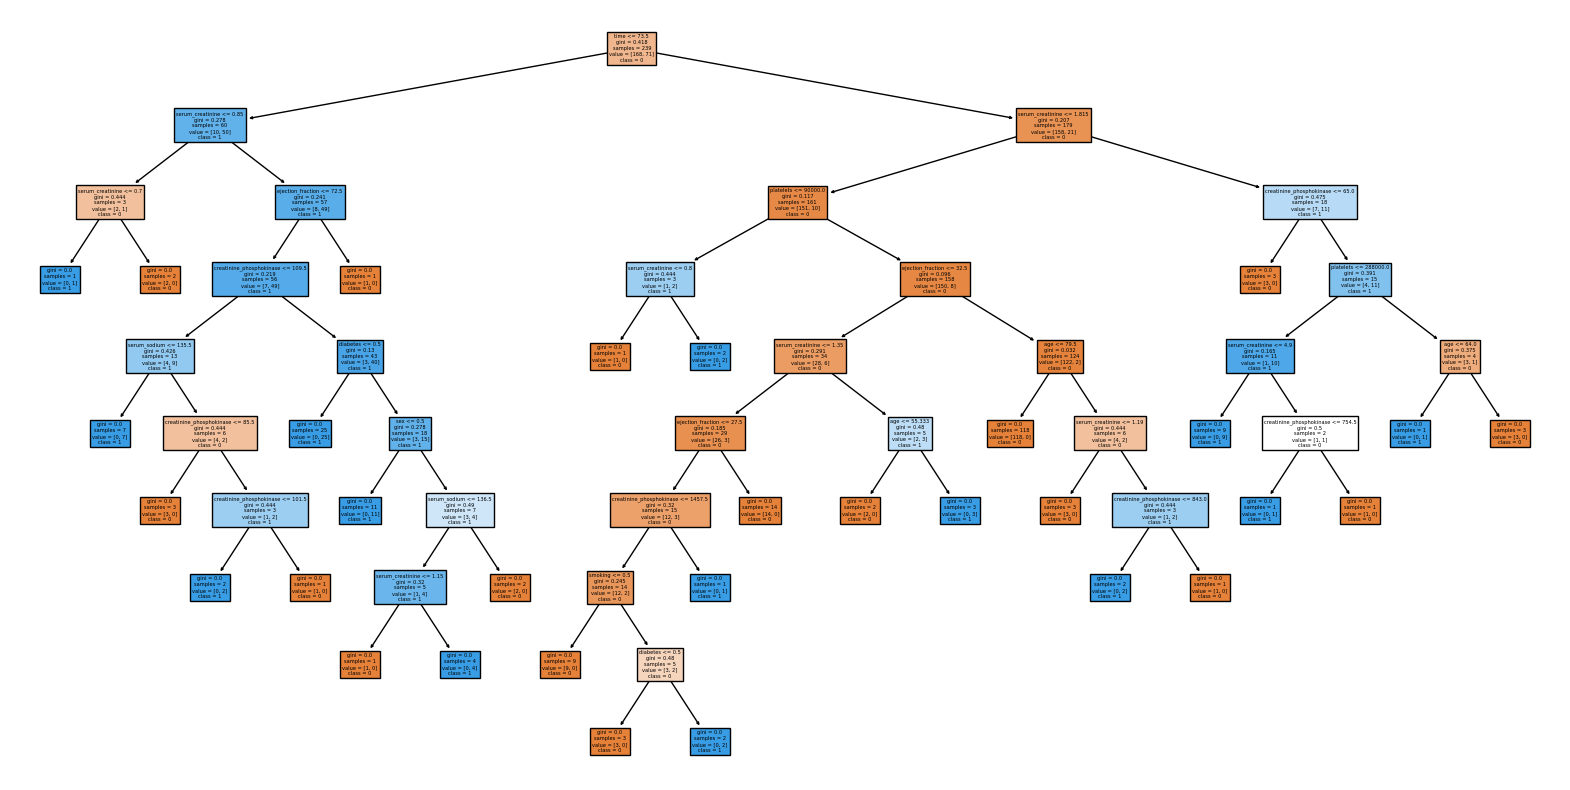

In [56]:
# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()

# plt.figure(figsize=(20,10)) untuk memastikan visualisasi pohon keputusan memiliki ukuran yang cukup besar. Kemudian, pohon keputusan (model) digambar menggunakan tree.plot_tree dengan spesifikasi fitur-fitur (feature_names=X.columns) dan kelas-kelas (class_names=[str(i) for i in sorted(y.unique())]). Argumen filled=True digunakan untuk memberikan warna pada node berdasarkan mayoritas kelasnya. 